## Introduction : Machine learning

This is a supervised, regression machine learning task: given a set of data with targets (in this case the log_price) included, we want to train a model that can learn to map the features (also known as the explanatory variables) to the target.

* Supervised problem: we are given both the features and the target
* Regression problem: the target is a continous variable, in this case ranging from 1.61-7.6

During training, we want the model to learn the relationship between the features and the log_price so we give it both the features and the answer. Then, to test how well the model has learned, we evaluate it on a testing set where it has never seen the answers!

### Imports

In [1]:
# Importing essential libraries

# pandas and numpy for data manipulation
import numpy as np
import pandas as pd

# matplotlib and seaborn for visuilization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# No warnings
import warnings
warnings.filterwarnings('ignore')

### Load in the Data and Examine

In [2]:
#Data frame with borders

In [3]:
# %%HTML
# <style type="text/css">
# table.dataframe td, table.dataframe th {
#     border: 1px  black solid !important;
#   color: black !important;
# }
# </style>

In [4]:
# read in data into dataframe
file_train=r'D:\Deloitte\case study\train.csv'
file_test=r'D:\Deloitte\case study\test.xlsx'

ab_train=pd.read_csv(file_train)
ab_test=pd.read_excel(file_test)

In [5]:
# Returns top 5 rows from the train dataset
ab_train.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price,
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,t,t,NaN,3/26/2012,f,7/18/2016,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.010635,NaN
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,t,f,100%,6/19/2017,t,9/23/2017,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,5.129899,NaN
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,t,t,100%,10/25/2016,t,9/14/2017,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,4.976734,NaN
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,4/19/2015,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,6.620073,NaN
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",5/12/2015,t,t,100%,3/1/2015,t,1/22/2017,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,4.744932,NaN


In [6]:
# Returns top 5 rows from the test dataset
ab_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,
0,5979389,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,NYC,2 bedroom apartment 3 blocks away from the Dek...,NaT,t,t,1.0,2015-05-29,f,NaT,40.705948,-73.915318,Bedroom in Renovated Apartment with Washer/Dryer,Ridgewood,0,NaN,https://a0.muscache.com/im/pictures/b43127ee-b...,11385,1.0,1.0,NaN
1,13488121,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,LA,This 2015 renovation was done with an eye to b...,2015-11-16,t,t,1.0,2015-08-17,f,2017-04-23,34.118408,-118.317929,Peaceful and Quiet Hollywood Hills,Hollywood Hills,24,100.0,https://a0.muscache.com/im/pictures/894d8ca5-7...,90068,1.0,1.0,NaN
2,8121643,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,NYC,Apt features shared living room w/ Apple TV. ...,NaT,t,f,NaN,2012-06-18,f,NaT,40.707888,-74.015211,"Luxury, doorman Building- FIDI",Financial District,0,NaN,NaN,10006,1.0,1.0,NaN
3,16490010,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,NYC,Our home is equidistance to the L and G trains...,2016-09-29,t,t,1.0,2011-12-12,f,2017-09-24,40.721388,-73.945642,Cozy room in sunny historic Greenpoint home,Greenpoint,12,98.0,https://a0.muscache.com/im/pictures/6c99615c-4...,11222,1.0,1.0,NaN
4,16274069,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,True,NYC,JUST 20 MINUTES BY TRAIN TO MANHATTAN - AFFORD...,2015-01-05,t,f,1.0,2014-11-02,f,2017-09-14,40.682556,-73.943259,B's Suite,Bedford-Stuyvesant,13,92.0,https://a0.muscache.com/im/pictures/56275358/c...,11216,2.0,3.0,NaN


In [7]:
# Returns the number of Rows and Columns in train data
print('shape of train data: {}'.format(ab_train.shape))

shape of train data: (49999, 30)


In [8]:
# Returns the number of Rows and Columns in test data
print('shape of test data: {}'.format(ab_test.shape))

shape of test data: (24111, 29)


In [9]:
# Returns basic information on all columns
ab_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      49999 non-null  int64  
 1   property_type           49999 non-null  object 
 2   room_type               49999 non-null  object 
 3   amenities               49999 non-null  object 
 4   accommodates            49999 non-null  int64  
 5   bathrooms               49853 non-null  float64
 6   bed_type                49999 non-null  object 
 7   cancellation_policy     49999 non-null  object 
 8   cleaning_fee            49999 non-null  bool   
 9   city                    49999 non-null  object 
 10  description             49999 non-null  object 
 11  first_review            39288 non-null  object 
 12  host_has_profile_pic    49872 non-null  object 
 13  host_identity_verified  49872 non-null  object 
 14  host_response_rate      37661 non-null

In [10]:
# Returns different statistics of Numerical columns[int and float] only
ab_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,49999.0,1.125866e+07,6.086302e+06,344.000000,6.245858e+06,1.225244e+07,1.641108e+07,2.122836e+07
accommodates,49999.0,3.157563e+00,2.165059e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,49853.0,1.235151e+00,5.820819e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
latitude,49999.0,3.844022e+01,3.082650e+00,33.338905,3.412487e+01,4.066220e+01,4.074598e+01,4.239044e+01
longitude,49999.0,-9.244626e+01,2.171982e+01,-122.511500,-1.183431e+02,-7.699768e+01,-7.395460e+01,-7.098505e+01
number_of_reviews,49999.0,2.100038e+01,3.813156e+01,0.000000,1.000000e+00,6.000000e+00,2.400000e+01,6.050000e+02
review_scores_rating,38698.0,9.405597e+01,7.870579e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,49937.0,1.266776e+00,8.539166e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,49908.0,1.712431e+00,1.259860e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01
log_price,49999.0,4.781831e+00,7.169100e-01,1.609438,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00


### Data Exploration

In [11]:
ab_train.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'log_price', ' '],
      dtype='object')

In [12]:
# 'id ---> drop this column while model building
ab_train['id'].value_counts()

11667455    1
4404492     1
15602984    1
18312487    1
288038      1
           ..
668179      1
2368017     1
14373031    1
3505222     1
9394419     1
Name: id, Length: 49999, dtype: int64

In [13]:
# 'property_type' --> create dummies based on dependent variable
ab_train['property_type'].value_counts()

Apartment             33113
House                 11138
Condominium            1759
Townhouse              1146
Loft                    834
Other                   392
Guesthouse              324
Bed & Breakfast         320
Bungalow                264
Villa                   120
Dorm                     99
Guest suite              83
Camper/RV                63
Cabin                    49
In-law                   49
Hostel                   48
Timeshare                46
Boutique hotel           44
Boat                     36
Serviced apartment       16
Tent                     12
Castle                    8
Vacation home             7
Yurt                      7
Treehouse                 6
Hut                       5
Chalet                    3
Earth House               2
Parking Space             1
Lighthouse                1
Train                     1
Casa particular           1
Tipi                      1
Cave                      1
Name: property_type, dtype: int64

In [14]:
pt_train=np.round(ab_train.groupby('property_type')['log_price'].mean(),0)
pt_train

property_type
Apartment             5.0
Bed & Breakfast       5.0
Boat                  5.0
Boutique hotel        5.0
Bungalow              5.0
Cabin                 5.0
Camper/RV             5.0
Casa particular       4.0
Castle                5.0
Cave                  5.0
Chalet                5.0
Condominium           5.0
Dorm                  4.0
Earth House           6.0
Guest suite           5.0
Guesthouse            5.0
Hostel                4.0
House                 5.0
Hut                   4.0
In-law                5.0
Lighthouse            6.0
Loft                  5.0
Other                 5.0
Parking Space         5.0
Serviced apartment    5.0
Tent                  4.0
Timeshare             6.0
Tipi                  6.0
Townhouse             5.0
Train                 5.0
Treehouse             5.0
Vacation home         5.0
Villa                 5.0
Yurt                  5.0
Name: log_price, dtype: float64

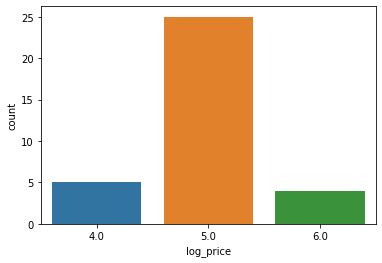

In [15]:
sns.countplot(x=pt_train)

In [16]:
# 'room_type' --> create dummies
ab_train['room_type'].value_counts()

Entire home/apt    27905
Private room       20658
Shared room         1436
Name: room_type, dtype: int64

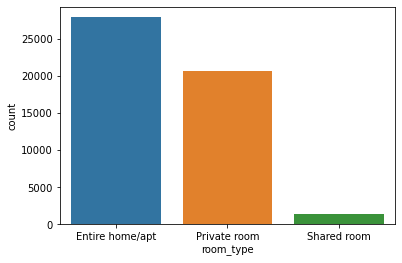

In [17]:
sns.countplot(x=ab_train['room_type'])

In [18]:
# 'amenities'---> lets try NLP by using tfdif or count vectorizer 
ab_train['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                           413
{"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                                                                                                                                                                                   97
{"Family/kid friendly"}                                                                                                                                                                                                               

In [19]:
ab_train['amenities'][0]

'{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'

In [20]:
# 'accommodates' --> let it be
ab_train['accommodates'].value_counts()

2     21529
4      8178
1      6360
3      5213
6      3331
5      2304
8      1199
7       640
10      472
16      210
12      190
9       183
14       77
11       51
15       38
13       24
Name: accommodates, dtype: int64

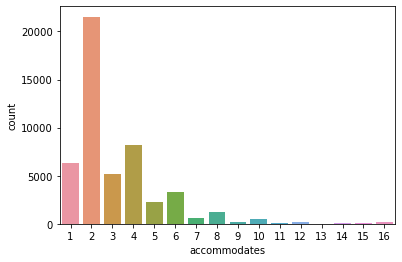

In [21]:
sns.countplot(x=ab_train['accommodates'])

In [22]:
# 'bathrooms' ---> bathrooms cannot be 1.5,2.5.... 
# so i will club or consider 0.5 to 1,1.5 to 2,2.5 to 3,3.5 to 4,4.5 to 5,5.5 to 6,6.5 and 7.5 to 7
# Replace missing value to 0.0 bathrooms
ab_train['bathrooms'].value_counts()

1.0    39136
2.0     5384
1.5     2619
2.5     1033
3.0      705
3.5      288
4.0      193
0.5      148
0.0      132
4.5       74
5.0       50
8.0       31
5.5       28
6.0       15
6.5        8
7.0        5
7.5        4
Name: bathrooms, dtype: int64

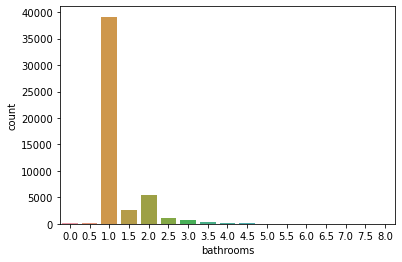

In [23]:
sns.countplot(x=ab_train['bathrooms'])

In [24]:
ab_train['bathrooms']=ab_train['bathrooms'].replace({0.5:1,1.5:2,
                                                     2.5:3,
                                                     3.5:4,
                                                    4.5:5,
                                                    5.5:6,
                                                    6.5:7,
                                                    7.5:7})

In [25]:
ab_train['bathrooms'].value_counts()

1.0    39284
2.0     8003
3.0     1738
4.0      481
0.0      132
5.0      124
6.0       43
8.0       31
7.0       17
Name: bathrooms, dtype: int64

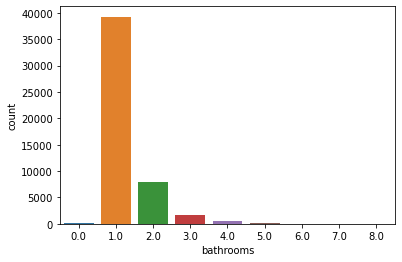

In [26]:
sns.countplot(x=ab_train['bathrooms'])

In [27]:
ab_train['bathrooms'].isnull().sum()

146

In [28]:
# 'bed_type'---> create Futon,Pull-out Sofa, Airbed, Couch to 'other' and then create dummies
ab_train['bed_type'].value_counts()

Real Bed         48575
Futon              518
Pull-out Sofa      403
Airbed             323
Couch              180
Name: bed_type, dtype: int64

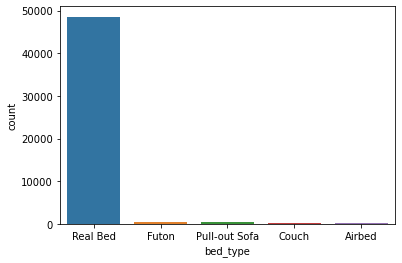

In [29]:
sns.countplot(x=ab_train['bed_type'])

In [30]:
ab_train.loc[~ab_train['bed_type'].isin(['Real Bed']), 'bed_type'] = 'Other'
ab_train['bed_type'].value_counts()

Real Bed    48575
Other        1424
Name: bed_type, dtype: int64

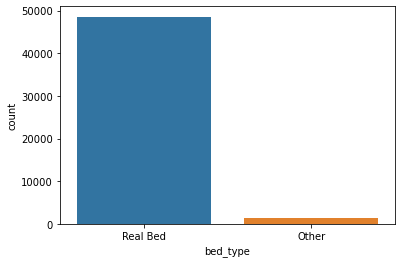

In [31]:
sns.countplot(x=ab_train['bed_type'])

In [32]:
# 'cancellation_policy'--->super_strict_30 and super_strict_60 to 'super_strict' and then create dummies
ab_train['cancellation_policy'].value_counts()

strict             21811
flexible           15237
moderate           12865
super_strict_30       75
super_strict_60       11
Name: cancellation_policy, dtype: int64

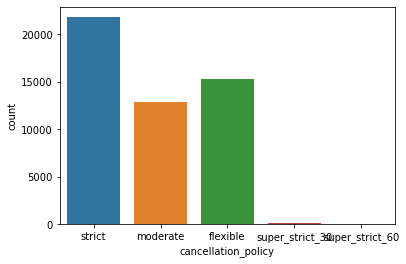

In [33]:
sns.countplot(ab_train['cancellation_policy'])

In [34]:
ab_train.loc[ab_train['cancellation_policy'].isin(['super_strict_30','super_strict_60']),
         'cancellation_policy']='super_strict'
ab_train['cancellation_policy'].value_counts()

strict          21811
flexible        15237
moderate        12865
super_strict       86
Name: cancellation_policy, dtype: int64

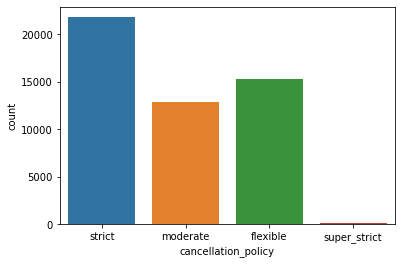

In [35]:
sns.countplot(x=ab_train['cancellation_policy'])

In [36]:
# 'cleaning_fee' ---> It is boolean data type. 
# In feature engineering, we will create True to 1 and False to 0
ab_train['cleaning_fee'].value_counts()

True     36627
False    13372
Name: cleaning_fee, dtype: int64

In [37]:
ab_train.dtypes

id                          int64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
log_price                 float64
              

In [38]:
# 'city'---> Due to less freqency count in some variables. lets club some features like
# SF and DC which has >3000 frequency count to one variable ie., SF_DC
# Chicago and Boston which has <3000 frequency count to one variable ie., other
# create dummies
ab_train['city'].value_counts()

NYC        21803
LA         15191
SF          4357
DC          3804
Chicago     2498
Boston      2346
Name: city, dtype: int64

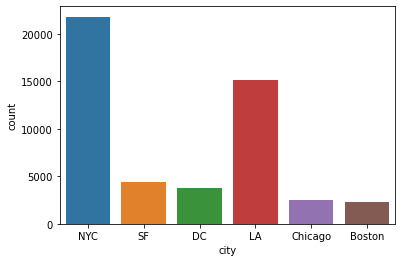

In [39]:
sns.countplot(x=ab_train['city'])

In [40]:
ab_train.loc[ab_train['city'].isin(['SF','DC']),'city']='SF_DC'
ab_train.loc[ab_train['city'].isin(['Chicago','Boston']),'city']='other'
ab_train['city'].value_counts()

NYC      21803
LA       15191
SF_DC     8161
other     4844
Name: city, dtype: int64

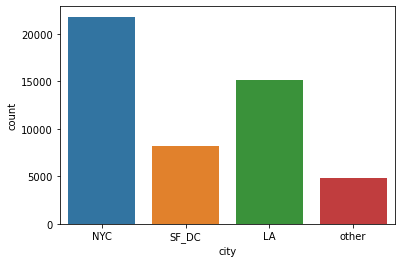

In [41]:
sns.countplot(x=ab_train['city'])

In [42]:
# 'description'---> lets try NLP by using tfdif or count vectorizer 
ab_train['description'].value_counts()

Hello, I've been running guest house for Koreans visiting U.S. for 3years, and recently decided to run this place for other travelers also. There are 10 room in the house. They are mostly dormitory rooms and couple of couple room and family room. This places are our women's dormitory in third floor. There are three rooms, but no doors. It is basically open space. There are 2 beds in two rooms and 4 in one room. I do not have closet in this room but there are hangers and mini shelves. My travelers usually put their baggage on the floor. There is one full bathroom only for women in 2nd floor, which you will be sharing with other women guests. Right next that bathroom, there is unisex half bathroom. All bathrooms have hair dryers. You cannot use kitchen, but you can use refrigerator.  I offer breakfast every morning from 7-10 am. Bread, cereal, fruits, coffee, milk and juice will be served. You can eat take-out food in the kitchen, but please wash dishes that you used and put trash in the

In [43]:
# 'first_review'---> lets covert into date-time format and extract features out of it
# Repace missing with  min_in_column timestamp to nan fields
ab_train['first_review'].value_counts()

1/1/2017     200
1/22/2017    170
1/2/2016     143
1/2/2017     136
1/3/2016     134
            ... 
3/10/2011      1
5/6/2009       1
4/5/2012       1
4/26/2010      1
5/4/2012       1
Name: first_review, Length: 2423, dtype: int64

In [44]:
# 'host_has_profile_pic'---> I think people use differnt images like celebrity photo and some use their own photo.
# It will be Imbalanced because one category frequency 99.4% of data.
# I think its better to drop
# Beacuse once the host identity is verified then only it will allows the host to book
ab_train['host_has_profile_pic'].value_counts()

t    49722
f      150
Name: host_has_profile_pic, dtype: int64

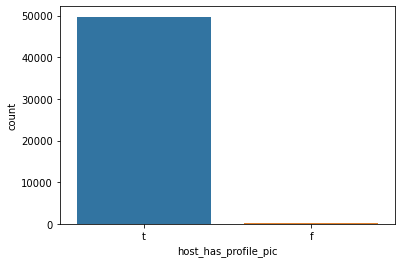

In [45]:
sns.countplot(x=ab_train['host_has_profile_pic'])

In [46]:
# 'host_identity_verified'---> I am assuming t tobe True or correct match and f to be False or Incorrect match
# Replace missig value with f 
# lets create  t to 1 and f to 0
ab_train['host_identity_verified'].value_counts()

t    33545
f    16327
Name: host_identity_verified, dtype: int64

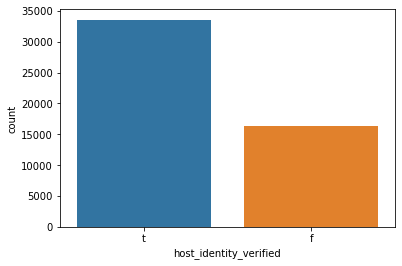

In [47]:
sns.countplot(x=ab_train['host_identity_verified'])

In [48]:
# 'host_response_rate'---> Replace '%' with '' (empty space) and then convert it numeric
# It has almost 25% of the missing values. 
# So I will craete indicator column like if response rate is there then 1 and if it is missing then 0
ab_train['host_response_rate'].value_counts()

100%    29124
90%      1563
80%       752
0%        597
50%       406
        ...  
23%         1
13%         1
15%         1
6%          1
39%         1
Name: host_response_rate, Length: 77, dtype: int64

In [49]:
ab_train['host_response_rate']=pd.to_numeric(ab_train['host_response_rate'].str.replace('%',''))
ab_train['host_response_rate'].value_counts()

100.0    29124
90.0      1563
80.0       752
0.0        597
50.0       406
         ...  
39.0         1
23.0         1
13.0         1
15.0         1
6.0          1
Name: host_response_rate, Length: 77, dtype: int64

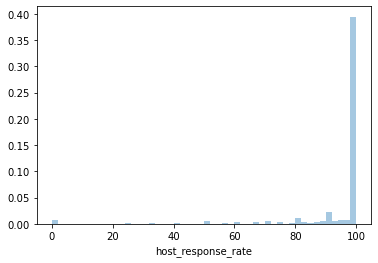

In [50]:
sns.distplot(a=ab_train['host_response_rate'])

* 'host_response_rate'--> we can see that most of them good rating 90% and 100%. 

* what can do is: people who gave less rating. call them and ask what is the issue or difficulty they faced while staying.Based upon issue, like we can provide discount, additional amenities in their next visit.

In [51]:
# 'host_since'--> lets covert into date-time format and extract features out of it and 
# Replace missing with median
ab_train['host_since'].value_counts()

3/30/2015     173
2/14/2014     114
5/18/2015      60
9/16/2016      58
10/15/2015     55
             ... 
7/25/2009       1
8/16/2008       1
2/11/2010       1
7/4/2009        1
2/6/2009        1
Name: host_since, Length: 3009, dtype: int64

In [52]:
# 'instant_bookable'---> lets create  t to 1 and f to 0
ab_train['instant_bookable'].value_counts()

f    36873
t    13126
Name: instant_bookable, dtype: int64

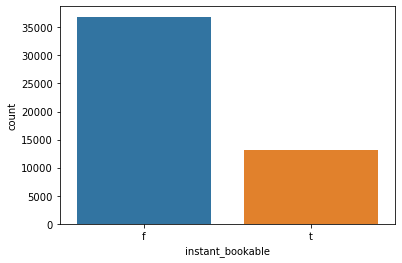

In [53]:
sns.countplot(x=ab_train['instant_bookable'])

In [54]:
pd.crosstab(ab_train['host_identity_verified'],ab_train['instant_bookable'])

instant_bookable,f,t
host_identity_verified,,
f,11098,5229
t,25671,7874


* In cross table, we can see frequency count of combinatons.It is giving me like instant_bookable f and host_identity_verified f is 11098 which is almost 22%. 
* we have to take care of instant_bookable f and host_identity_verified t is 25671 which is almost 51%. means we have to instant booking avalibility. so that we can make profits out f it.

In [55]:
# 'last_review'--> lets covert into date-time format and extract features out of it and
# Replace missing with min_val_column
ab_train['last_review'].value_counts()

4/30/2017     892
9/24/2017     856
9/17/2017     791
4/23/2017     693
9/18/2017     565
             ... 
10/5/2012       1
9/3/2014        1
7/11/2012       1
10/30/2011      1
1/25/2014       1
Name: last_review, Length: 1257, dtype: int64

In [56]:
# 'latitude'--> lets use clustering for latitude,longitude and neighborhood and 
# create groups out of it
ab_train['latitude'].value_counts()

37.775394    2
40.729826    2
34.086309    2
40.844920    2
40.686782    2
            ..
40.723720    1
40.653315    1
34.064982    1
40.716145    1
34.039182    1
Name: latitude, Length: 49976, dtype: int64

In [57]:
# 'longitude'--->lets use clustering for latitude,longitude and neighborhood and 
# create groups out of it
ab_train['longitude'].value_counts()

-122.434945    2
-118.380004    2
-74.005940     2
-73.958905     2
-118.419493    2
              ..
-118.329875    1
-118.428942    1
-122.411254    1
-73.989600     1
-73.990121     1
Name: longitude, Length: 49929, dtype: int64

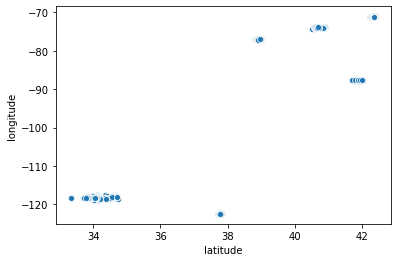

In [58]:
sns.scatterplot(ab_train['latitude'],ab_train['longitude'])

In [59]:
# 'name' ---> lets try NLP by using tfdif or count vectorizer 
ab_train['name'].value_counts()

Bunk bed in the Treat Street Clubhouse              7
Cozy Private Room                                   6
#NAME?                                              6
Your home away from home                            5
Charming East Village Apartment                     5
                                                   ..
Recording and Film studio on site with producers    1
Luxury Renaissance Style Apartment                  1
CHELSEA 1 bedroom in great location                 1
Private two BR apartment in convenient location     1
Brand new 2 min to Staples Center                   1
Name: name, Length: 49629, dtype: int64

In [60]:
# 'neighbourhood'---> lets drop it now since it has lot of unique values. we make use of lat and long
# we can clustering for latitude,longitude and neighborhood and create groups out of it.
ab_train['neighbourhood'].value_counts()

Williamsburg          1909
Bedford-Stuyvesant    1462
Bushwick              1081
Upper West Side        966
Mid-Wilshire           961
                      ... 
Randall Manor            1
Beverly                  1
Arrochar                 1
Mt. Vernon Square        1
Artesia                  1
Name: neighbourhood, Length: 598, dtype: int64

In [61]:
# number of reviews--> let it be
ab_train['number_of_reviews'].value_counts()

0      10678
1       4782
2       3224
3       2474
4       1926
       ...  
274        1
465        1
337        1
400        1
383        1
Name: number_of_reviews, Length: 346, dtype: int64

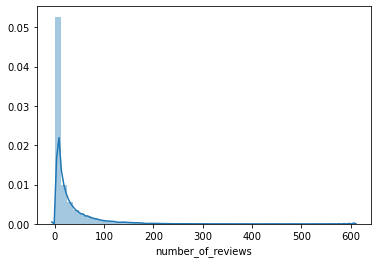

In [62]:
sns.distplot(ab_train['number_of_reviews'])

* it is positively skewed.lets apply log transformation and see

In [63]:
# 'review_scores_rating' --> Since there are almost 22.6% values are Missing.
# lets create a indicator column if its  non-missing-->1 and missing-->0
ab_train['review_scores_rating'].value_counts()

100.0    10934
98.0      2924
97.0      2807
96.0      2752
95.0      2495
93.0      2454
90.0      1907
99.0      1796
94.0      1710
80.0      1469
92.0      1398
91.0      1093
89.0       755
88.0       749
87.0       732
85.0       428
86.0       349
60.0       313
84.0       291
83.0       265
70.0       148
82.0       137
73.0       112
81.0        79
75.0        66
40.0        66
20.0        64
78.0        56
79.0        53
77.0        50
76.0        48
67.0        42
74.0        27
72.0        23
65.0        21
50.0        20
68.0        12
71.0        11
53.0         8
69.0         7
64.0         7
66.0         3
63.0         3
27.0         2
47.0         2
62.0         2
57.0         2
58.0         1
49.0         1
54.0         1
35.0         1
55.0         1
30.0         1
Name: review_scores_rating, dtype: int64

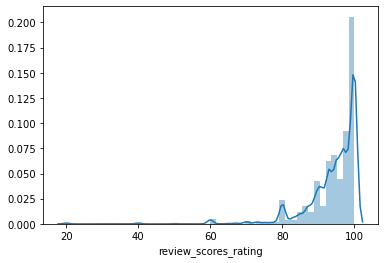

In [64]:
sns.distplot(a=ab_train['review_scores_rating'])

In [65]:
# 'thumbnail_url' --> for building Ml model, lets drop this variable
# In Deep leraning Model lets create some features out of this images and replace with ----

ab_train['thumbnail_url'].value_counts()

https://a0.muscache.com/im/pictures/104667326/a7a2b145_original.jpg?aki_policy=small             2
https://a0.muscache.com/im/pictures/109405834/9a555e66_original.jpg?aki_policy=small             2
https://a0.muscache.com/im/pictures/4491e5c5-33f6-4704-9887-76a059f86fda.jpg?aki_policy=small    2
https://a0.muscache.com/im/pictures/70087089/bc66229a_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/28563531/1000de61_original.jpg?aki_policy=small              2
                                                                                                ..
https://a0.muscache.com/im/pictures/01522392-4c9c-4241-84fc-7c440e42452d.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/80b33218-5ad4-464d-a3c0-1959ea8eaa41.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/ae9286d5-aa64-4654-92d6-0665c8a71212.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/10f81f63-9968-422c-9048-8e4c86683514.jpg?aki_policy=small    1
https://a0

In [66]:
# zipcode ---> Lets drop this variable. 
# Make use of latitude, longitude and Neighborhood and create cluster out of it 
ab_train['zipcode'].value_counts()

11211                                                   1068
90291                                                    862
11221                                                    802
11206                                                    697
94110                                                    686
                                                        ... 
95202\r\r\r\r\r\r\n\r\r\r\r\r\r\n\r\r\r\r\r\r\n94158       1
11249\r\r\r\r\r\r\n11249                                   1
11362                                                      1
15074                                                      1
10106                                                      1
Name: zipcode, Length: 639, dtype: int64

In [67]:
# 'bedrooms'---> Replace missing value with median
ab_train['bedrooms'].value_counts()

1.0     33543
2.0      7678
0.0      4542
3.0      2910
4.0       901
5.0       234
6.0        84
7.0        27
10.0        7
8.0         6
9.0         5
Name: bedrooms, dtype: int64

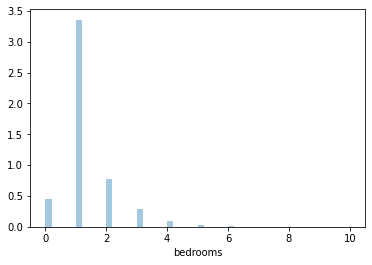

In [68]:
sns.distplot(a=ab_train['bedrooms'])

In [69]:
ab_train['bedrooms'].isnull().sum()

62

In [70]:
# 'beds'---> Replace missing value with median
ab_train['beds'].value_counts()

1.0     30420
2.0     11354
3.0      4294
4.0      2039
5.0       888
6.0       442
7.0       139
8.0       134
10.0       64
9.0        52
12.0       23
16.0       23
11.0       17
13.0        7
15.0        5
14.0        4
0.0         3
Name: beds, dtype: int64

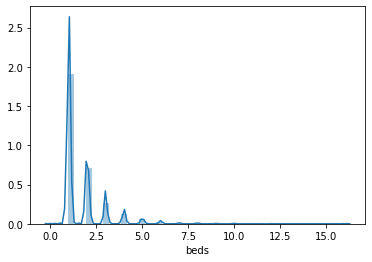

In [71]:
sns.distplot(a=ab_train['beds'])

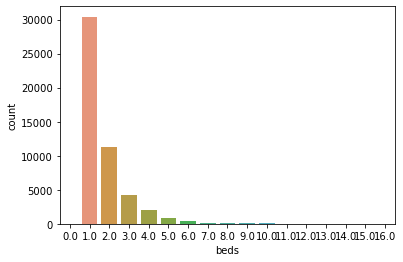

In [72]:
sns.countplot(x=ab_train['beds'])

In [73]:
ab_train['beds'].isnull().sum()

91

In [74]:
# 'log_price'--> I am assuming that log_price is log transformed prices
# my Target variable
ab_train['log_price'].value_counts()

4.605170    1819
5.010635    1809
4.317488    1383
5.298317    1308
3.912023    1237
            ... 
6.272877       1
6.706862       1
6.599870       1
7.442493       1
6.510258       1
Name: log_price, Length: 699, dtype: int64

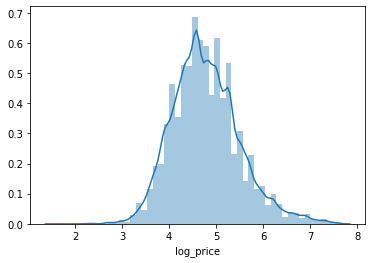

In [75]:
sns.distplot(a=ab_train['log_price'])

### Missing values

In [77]:
# checking count of null values in each column in train data
ab_train.isnull().sum()

id                            0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   146
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10711
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12338
host_since                  127
instant_bookable              0
last_review               10683
latitude                      0
longitude                     0
name                          0
neighbourhood              4617
number_of_reviews             0
review_scores_rating      11301
thumbnail_url              5595
zipcode                     640
bedrooms                     62
beds                         91
log_price                     0
                          49999
dtype: int64

In [78]:
# checking count of null values in each column in test data
ab_test.isnull().sum()

id                            0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                    54
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   1
first_review               5153
host_has_profile_pic         61
host_identity_verified       61
host_response_rate         5961
host_since                   61
instant_bookable              0
last_review                5144
latitude                      0
longitude                     0
name                          4
neighbourhood              2255
number_of_reviews             0
review_scores_rating       5421
thumbnail_url              2621
zipcode                     326
bedrooms                     29
beds                         40
                          24111
dtype: int64

Both train and test data features have lot of missing values and we will explore and lets see how we can treat them.

In [79]:
list(zip(ab_train.columns,ab_train.dtypes,ab_train.nunique()))

[('id', dtype('int64'), 49999),
 ('property_type', dtype('O'), 34),
 ('room_type', dtype('O'), 3),
 ('amenities', dtype('O'), 46190),
 ('accommodates', dtype('int64'), 16),
 ('bathrooms', dtype('float64'), 9),
 ('bed_type', dtype('O'), 2),
 ('cancellation_policy', dtype('O'), 4),
 ('cleaning_fee', dtype('bool'), 2),
 ('city', dtype('O'), 4),
 ('description', dtype('O'), 49683),
 ('first_review', dtype('O'), 2423),
 ('host_has_profile_pic', dtype('O'), 2),
 ('host_identity_verified', dtype('O'), 2),
 ('host_response_rate', dtype('float64'), 77),
 ('host_since', dtype('O'), 3009),
 ('instant_bookable', dtype('O'), 2),
 ('last_review', dtype('O'), 1257),
 ('latitude', dtype('float64'), 49976),
 ('longitude', dtype('float64'), 49929),
 ('name', dtype('O'), 49629),
 ('neighbourhood', dtype('O'), 598),
 ('number_of_reviews', dtype('int64'), 346),
 ('review_scores_rating', dtype('float64'), 53),
 ('thumbnail_url', dtype('O'), 44399),
 ('zipcode', dtype('O'), 639),
 ('bedrooms', dtype('float64

In [80]:
# 'id' as a numerical type doesn't make sense. As it a unique identifier and we cannot use this 
# in the modelling process we will drop it.

# 'thumbnail_url'---> It has lot of unique values. we will drop it because url's cannot extract 
# feature out of it

# we will drop last column as well because the whole column contains NaN (Missing values). we can
# treat it as junk variable

In [81]:
print('train data shape before: {}'.format(ab_train.shape))
ab_train.drop([' '],axis=1,inplace=True)
print('train data shape after: {}'.format(ab_train.shape))

train data shape before: (49999, 30)
train data shape after: (49999, 29)


In [82]:
feature_with_nan=[feature for feature in ab_train.columns if ab_train[feature].isnull().sum()>1]
feature_with_nan

['bathrooms',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'last_review',
 'neighbourhood',
 'review_scores_rating',
 'thumbnail_url',
 'zipcode',
 'bedrooms',
 'beds']

In [83]:
for feature in feature_with_nan:
    print('{}: {}% missing values'.format(feature,np.round(ab_train[feature].isnull().mean(),3)*100))

bathrooms: 0.3% missing values
first_review: 21.4% missing values
host_has_profile_pic: 0.3% missing values
host_identity_verified: 0.3% missing values
host_response_rate: 24.7% missing values
host_since: 0.3% missing values
last_review: 21.4% missing values
neighbourhood: 9.2% missing values
review_scores_rating: 22.6% missing values
thumbnail_url: 11.200000000000001% missing values
zipcode: 1.3% missing values
bedrooms: 0.1% missing values
beds: 0.2% missing values


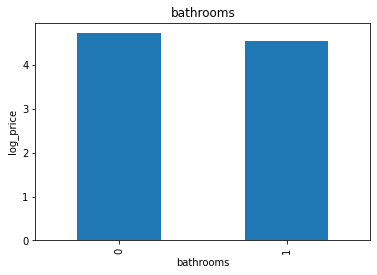

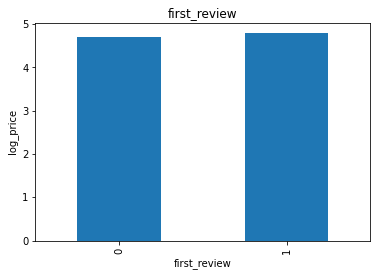

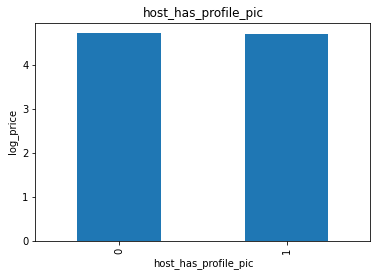

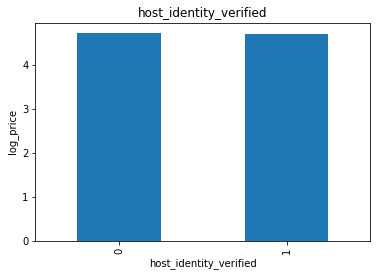

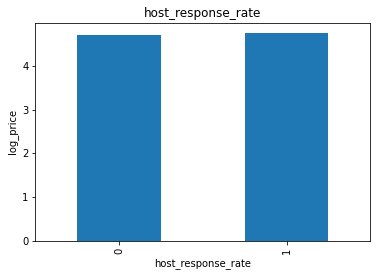

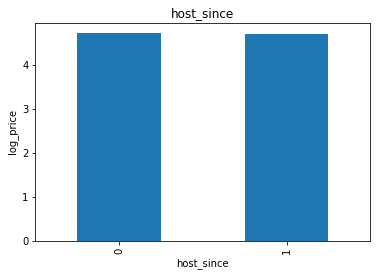

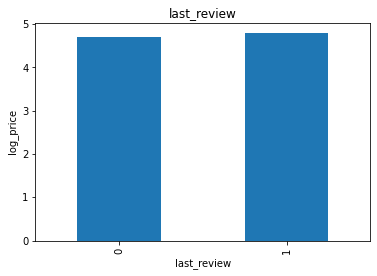

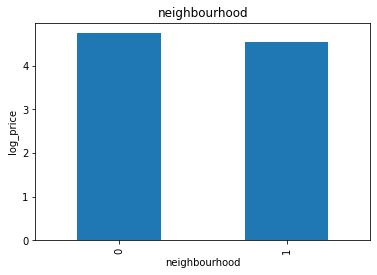

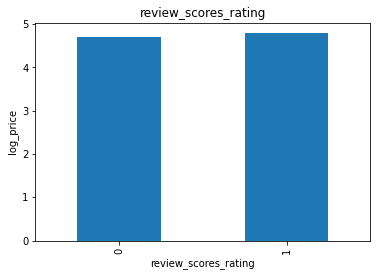

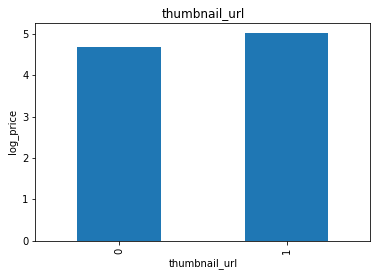

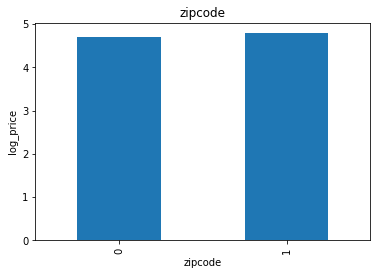

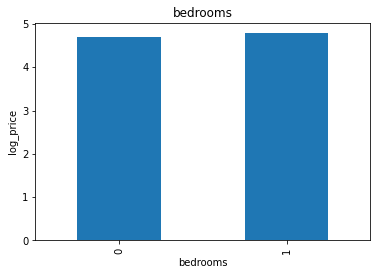

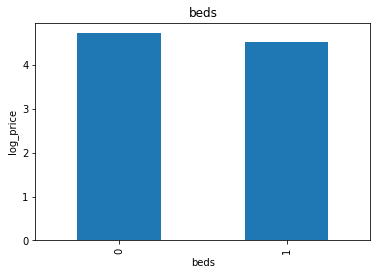

In [84]:
for feature in feature_with_nan:
    train=ab_train.copy()
    
    train[feature]=np.where(train[feature].isnull(),1,0)
    
    train.groupby(feature)['log_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.title(feature)
    plt.show()


Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [85]:
### Numerical features

In [86]:
numerical_feature=[feature for feature in ab_train.columns if ab_train[feature].dtypes !='O' and 
                   feature not in ['id']]
print('Number of Numerical features: {}'.format(len(numerical_feature)))

ab_train[numerical_feature].head()

Number of Numerical features: 11


,accommodates,bathrooms,cleaning_fee,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,log_price
0,3,1.0,True,NaN,40.696524,-73.991617,2,100.0,1.0,1.0,5.010635
1,7,1.0,True,100.0,40.766115,-73.989040,6,93.0,3.0,3.0,5.129899
2,5,1.0,True,100.0,40.808110,-73.943756,10,92.0,1.0,3.0,4.976734
3,4,1.0,True,NaN,37.772004,-122.431619,0,NaN,2.0,2.0,6.620073
4,2,1.0,True,100.0,38.925627,-77.034596,4,40.0,0.0,1.0,4.744932


In [87]:
discrete_feature=[feature for feature in numerical_feature if len(ab_train[feature].unique())<25]
print('Number of discrete features: {}'.format(len(discrete_feature)))

ab_train[discrete_feature].head()

Number of discrete features: 5


,accommodates,bathrooms,cleaning_fee,bedrooms,beds
0,3,1.0,True,1.0,1.0
1,7,1.0,True,3.0,3.0
2,5,1.0,True,1.0,3.0
3,4,1.0,True,2.0,2.0
4,2,1.0,True,0.0,1.0


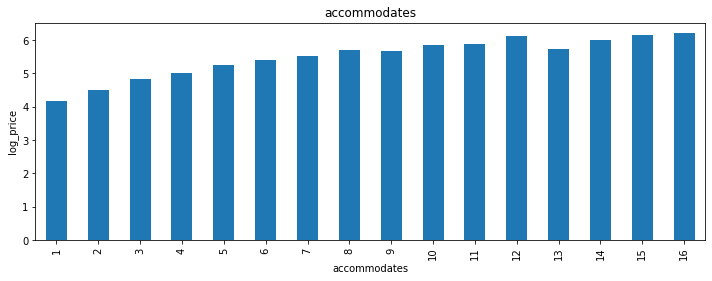

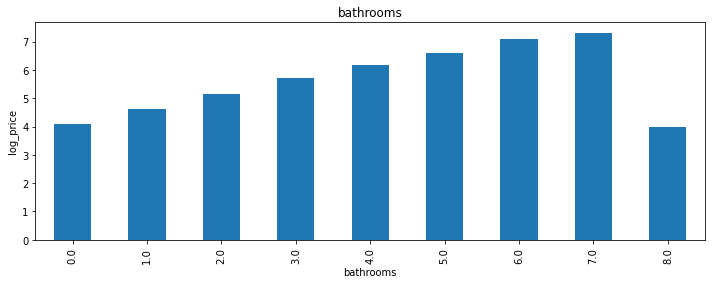

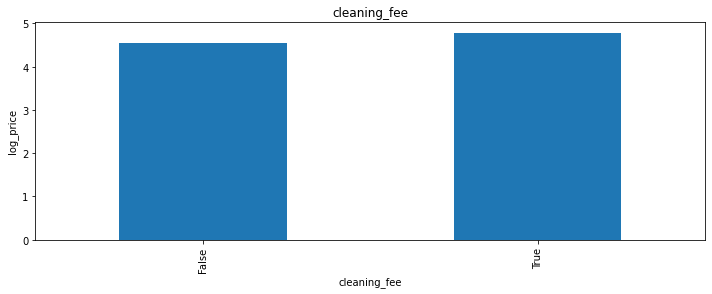

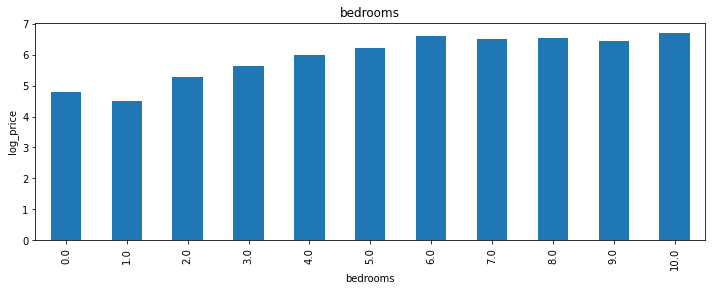

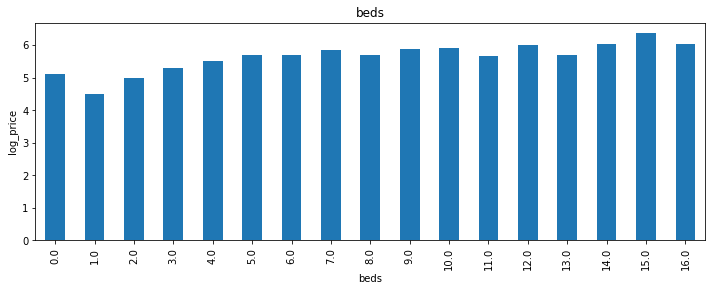

In [88]:
## Lets Find the realtionship between them and lag_price

for feature in discrete_feature:
    data=ab_train.copy()
    plt.figure(figsize=(12,4))
    data.groupby(feature)['log_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.title(feature)
    plt.show()

There is a clear relationship between variable number and log_Price

In [89]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]
print('Number of Continuous features: {}'.format(len(continuous_feature)))

ab_train[continuous_feature].head()

Number of Continuous features: 6


,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,log_price
0,NaN,40.696524,-73.991617,2,100.0,5.010635
1,100.0,40.766115,-73.989040,6,93.0,5.129899
2,100.0,40.808110,-73.943756,10,92.0,4.976734
3,NaN,37.772004,-122.431619,0,NaN,6.620073
4,100.0,38.925627,-77.034596,4,40.0,4.744932


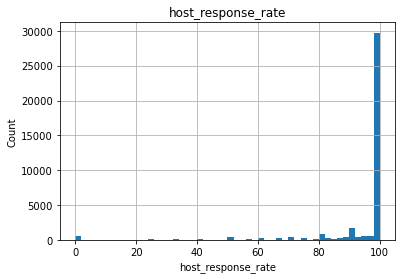

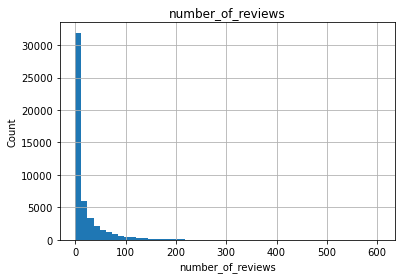

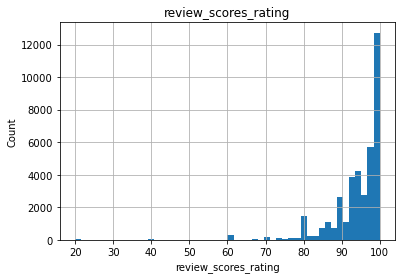

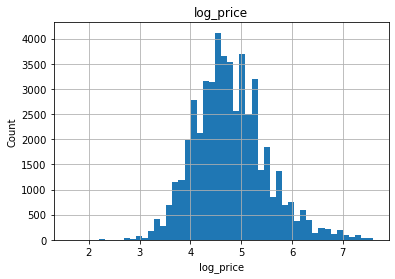

In [90]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=ab_train.copy()
    if feature not in ['latitude','longitude']:
        data[feature].hist(bins=50)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

* 'number_of_reviews' ---> It is posivively skewed
* 'log_price' ---> Normally distributed

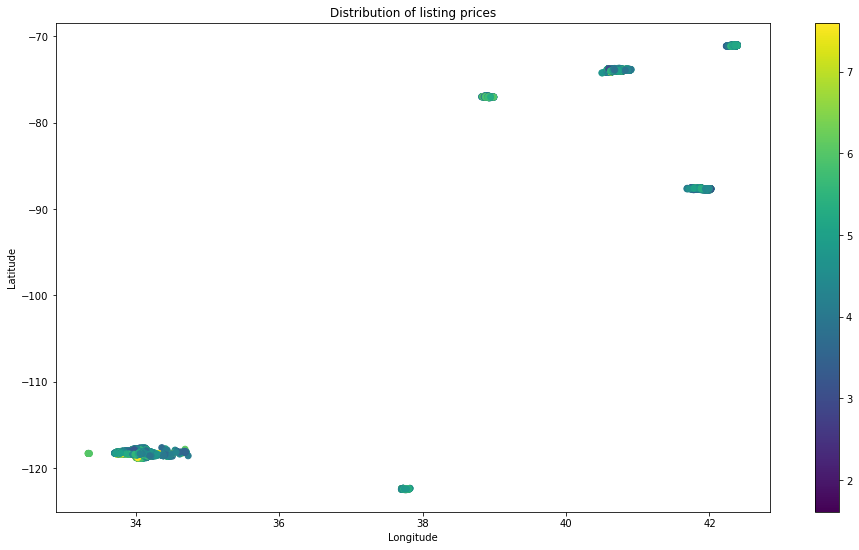

In [91]:
plt.figure(figsize=(16,9))
plt.scatter(x=ab_train['latitude'],y=ab_train['longitude'],c=ab_train['log_price'],cmap='viridis')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of listing prices")
plt.show()

### outliers

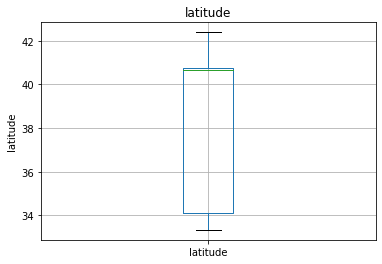

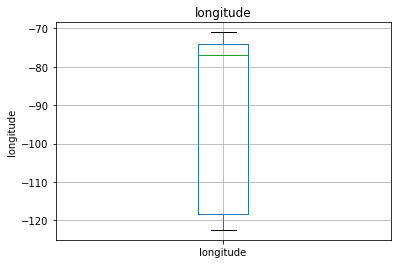

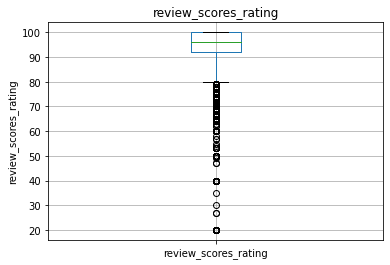

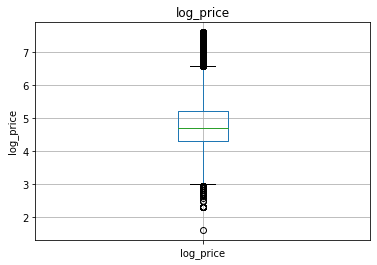

In [92]:
for feature in continuous_feature:
    data=ab_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

###### 'review_scores_rating' ---> It has has lot of outliers o the lower side of box plot.
* we should check whether the data we collected is correctlly written and we should check with 
those customers why did they gave lower rating. 
* we are going to tree based algorithims and it will take care of it

In [93]:
date_time=['first_review','host_since','last_review']
print('Number of date_time features: {}'.format(len(date_time)))

ab_train[date_time].head()

Number of date_time features: 3


,first_review,host_since,last_review
0,6/18/2016,3/26/2012,7/18/2016
1,8/5/2017,6/19/2017,9/23/2017
2,4/30/2017,10/25/2016,9/14/2017
3,NaN,4/19/2015,NaN
4,5/12/2015,3/1/2015,1/22/2017


In [108]:
data=ab_train.copy()

In [109]:
data['first_review']=pd.to_datetime(data['first_review'],format='%m/%d/%Y',errors='coerce').dt.year.fillna(0)

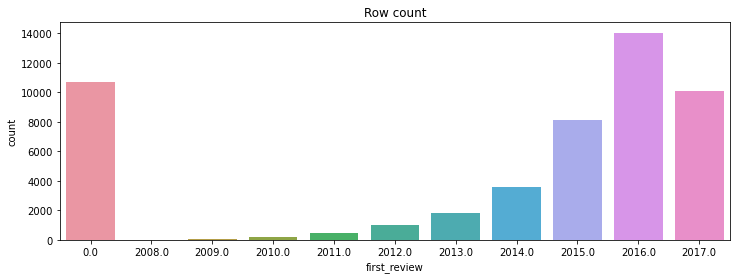

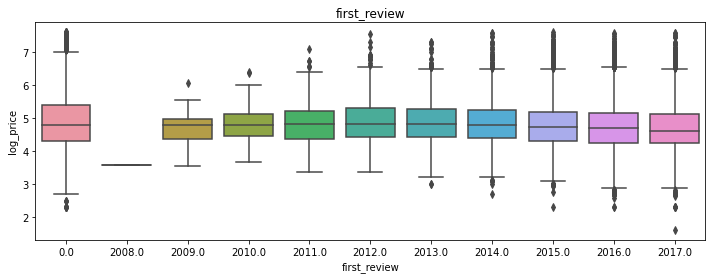

In [110]:
# countplot
plt.figure(figsize=(12,4))
sns.countplot(x="first_review", data=data)
plt.title('Row count')
plt.show()

# Boxplot
plt.figure(figsize=(12,4))
sns.boxplot( x='first_review',y='log_price',data=data,orient='v')
plt.title('first_review')
plt.show()

In [98]:
data['host_since']=pd.to_datetime(data['host_since'],format='%m/%d/%Y',errors='coerce').dt.year.fillna(0)

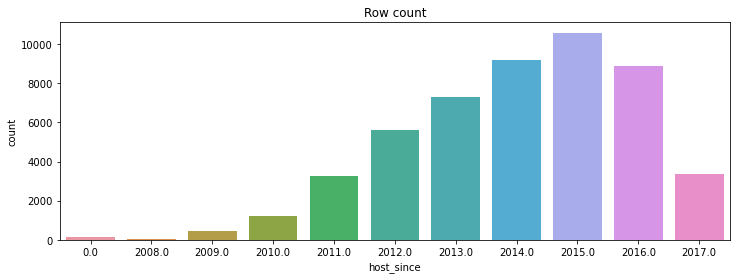

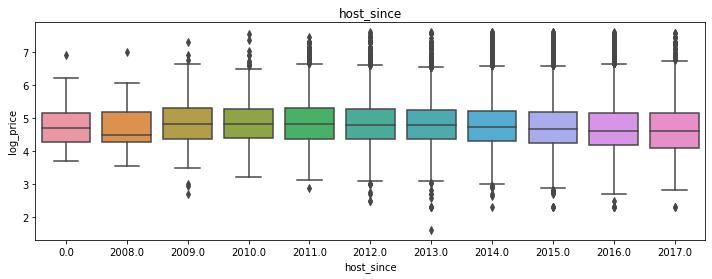

In [99]:
# countplot
plt.figure(figsize=(12,4))
sns.countplot(x="host_since", data=data)
plt.title('Row count')
plt.show()

# Boxplot
plt.figure(figsize=(12,4))
sns.boxplot( x='host_since',y='log_price',data=data,orient='v')
plt.title('host_since')
plt.show()

In [100]:
data['last_review']=pd.to_datetime(data['last_review'],format='%m/%d/%Y',errors='coerce').dt.year.fillna(0)

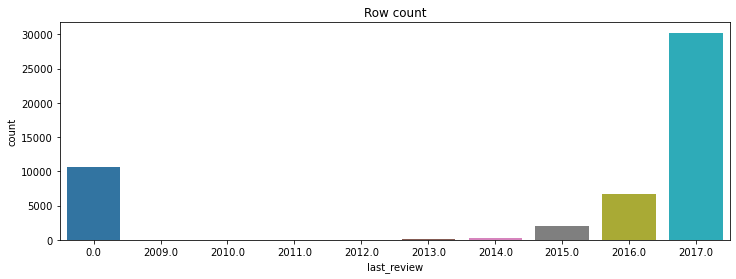

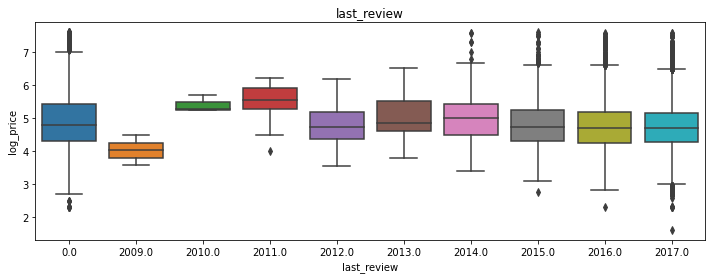

In [101]:
# countplot
plt.figure(figsize=(12,4))
sns.countplot(x="last_review", data=data)
plt.title('Row count')
plt.show()

# Boxplot
plt.figure(figsize=(12,4))
sns.boxplot( x='last_review',y='log_price',data=data,orient='v')
plt.title('last_review')
plt.show()

In [102]:
text_data=[ 'amenities', 'description', 'name']
print('Number of text_data features: {}'.format(len(text_data)))
ab_train[text_data].head()

Number of text_data features: 3


,amenities,description,name
0,"{""Wireless Internet"",""Air conditioning"",Kitche...","Beautiful, sunlit brownstone 1-bedroom in the ...",Beautiful brownstone 1-bedroom
1,"{""Wireless Internet"",""Air conditioning"",Kitche...",Enjoy travelling during your stay in Manhattan...,Superb 3BR Apt Located Near Times Square
2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",The Oasis comes complete with a full backyard ...,The Garden Oasis
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",This light-filled home-away-from-home is super...,Beautiful Flat in the Heart of SF!
4,"{TV,Internet,""Wireless Internet"",""Air conditio...","Cool, cozy, and comfortable studio located in ...",Great studio in midtown DC


In [103]:
image_data=['thumbnail_url']
print('Number of image_data features: {}'.format(len(image_data)))
ab_train[image_data].head()

Number of image_data features: 1


,thumbnail_url
0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...
1,https://a0.muscache.com/im/pictures/348a55fe-4...
2,https://a0.muscache.com/im/pictures/6fae5362-9...
3,https://a0.muscache.com/im/pictures/72208dad-9...
4,NaN


In [104]:
categotical_features=[feature for feature in ab_train.columns if feature not in numerical_feature+['id']+
                     date_time+text_data+image_data]
print('Number of Categorical features: {}'.format(len(categotical_features)))
ab_train[categotical_features].head()

Number of Categorical features: 10


,property_type,room_type,bed_type,cancellation_policy,city,host_has_profile_pic,host_identity_verified,instant_bookable,neighbourhood,zipcode
0,Apartment,Entire home/apt,Real Bed,strict,NYC,t,t,f,Brooklyn Heights,11201
1,Apartment,Entire home/apt,Real Bed,strict,NYC,t,f,t,Hell's Kitchen,10019
2,Apartment,Entire home/apt,Real Bed,moderate,NYC,t,t,t,Harlem,10027
3,House,Entire home/apt,Real Bed,flexible,SF_DC,t,t,f,Lower Haight,94117
4,Apartment,Entire home/apt,Real Bed,moderate,SF_DC,t,t,t,Columbia Heights,20009


In [105]:
for feature in categotical_features:
    print('The feature is: {} and Number of categories are: {}'.format(feature,len(ab_train[feature].unique())))

The feature is: property_type and Number of categories are: 34
The feature is: room_type and Number of categories are: 3
The feature is: bed_type and Number of categories are: 2
The feature is: cancellation_policy and Number of categories are: 4
The feature is: city and Number of categories are: 4
The feature is: host_has_profile_pic and Number of categories are: 3
The feature is: host_identity_verified and Number of categories are: 3
The feature is: instant_bookable and Number of categories are: 2
The feature is: neighbourhood and Number of categories are: 599
The feature is: zipcode and Number of categories are: 640


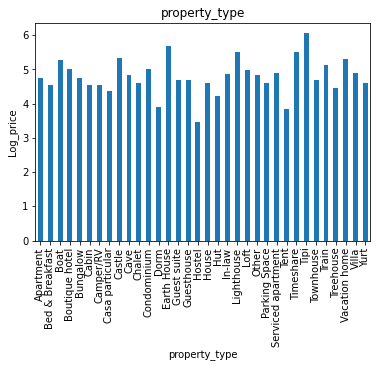

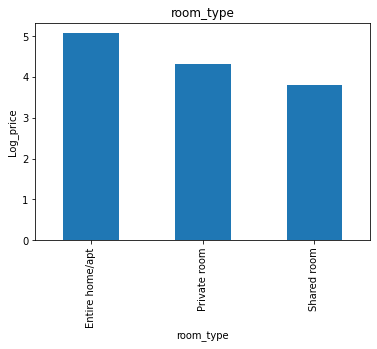

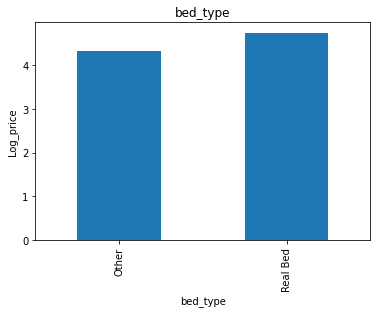

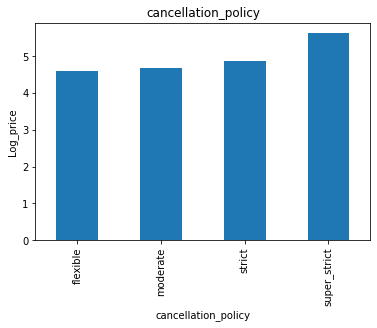

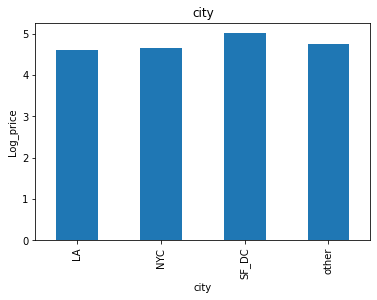

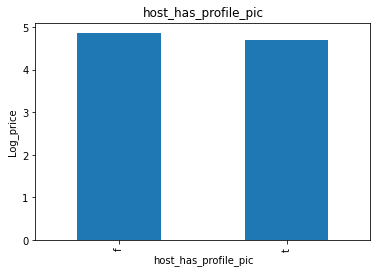

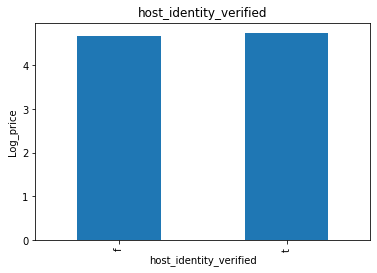

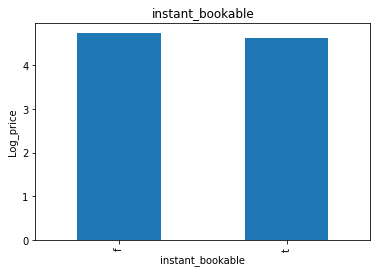

In [106]:
for feature in categotical_features:
    if feature not in ['neighbourhood','zipcode']:
        data=ab_train.copy()
        data.groupby(feature)['log_price'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Log_price')
        plt.title(feature)
        plt.show()

* we can see there is a relationship between them and dependent feature log_price
* 'room_type'---> is monotonically decreasing based on dependent variable.
* 'property_type' ----> since it has lot of categories.create dummies based on some frequency cutoff